In [1]:
#importing modules
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import HTML
from ipywidgets.widgets import interact, FloatSlider, Layout, IntSlider
%matplotlib inline

# SIRH model: including a healthcare population in the SIR model

In [171]:
style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

#model definition
def plot_ode_solution(k0,k1,k2,k3,k4,ic0,ic1,ic2,tm):
    #model definition
    def modSIRH(y,t,N,k):
        #assignments
        S=N-sum(y[0:2])
        dy=[0]*3

        #reaction rates
        v0=k[0]*(S/N)*(y[0]/N) #k0*S*I
        v1=k[1]*(y[0]/N) #k1*I
        v2=(1-k[2])*(y[0]/N)*(y[2]/N) #(1-PPE)*I*H
        v3=k[3]*k[4]*(y[0]/N)*(y[2]/N) #k3*Vent*I*H

        #ODEs
        dy[0]=N*(v0+v2-v1-v3) #I
        dy[1]=N*(v1+v3) #R
        dy[2]=N*(-v2) #H

        return dy

    #parameters
    ##default parameters
    k=[k0,k1,k2,k3,k4]
    N=1 #population count
    ##Initial conditions
    ic=[ic0,ic1,ic2]
    ##timeline
    tmax=tm #number of days
    tvec=np.arange(0,tmax,0.1)

    #solving equations
    soln=odeint(modSIRH,ic,tvec,args=(N,k))
    #plotting solution
    plt.figure(figsize=(13,5))
    plt.subplot(1,3,1)
    #plt.plot(tvec,soln)
    plt.plot(tvec,[i[0] for i in soln])
    legend_labels = ("Infected","Recovered","Healthcare")
    plt.xlabel("Time (days)")
    plt.title("Healthcare pressure COVID")
    plt.ylabel("Number of Infected Cases")
    plt.legend(legend_labels)
    #plt.ylim([0,20])

##default parameters
interact(plot_ode_solution,
        k0=FloatSlider(min=0, max=1, step=0.01, value=0.3, description='Infection rate', style=style, layout=slider_layout),
        k1=FloatSlider(min=0, max=1, step=0.01, value=0.01, description='Recovery rate', style=style, layout=slider_layout),
        k2=FloatSlider(min=0, max=1, step=0.01, value=0.001, description='PPE fraction', style=style, layout=slider_layout),
        k3=FloatSlider(min=0, max=1, step=0.01, value=0.02, description='Infection rate for healthcare', style=style, layout=slider_layout),
        k4=FloatSlider(min=0, max=1, step=0.01, value=1, description='Ventilator fraction', style=style, layout=slider_layout),
        ic0=FloatSlider(min=0, max=1, step=0.01, value=0.16, description='#Infected', style=style, layout=slider_layout),
        ic1=FloatSlider(min=0, max=1, step=0.01, value=0, description='#Recovered', style=style, layout=slider_layout),
        ic2=FloatSlider(min=0, max=1, step=0.01, value=0, description='#Healthcare', style=style, layout=slider_layout),
        tm=IntSlider(min=0, max=3000, step=10, value=100, description='#days', style=style, layout=slider_layout))

interactive(children=(FloatSlider(value=0.3, description='Infection rate', layout=Layout(width='99%'), max=1.0…

<function __main__.plot_ode_solution(k0, k1, k2, k3, k4, ic0, ic1, ic2, tm)>

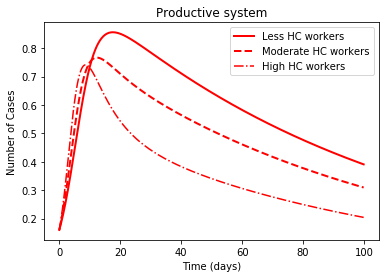

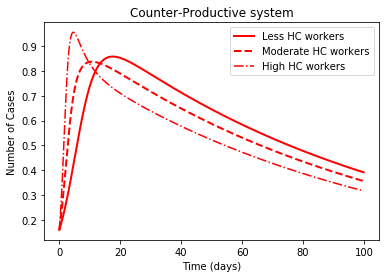

In [195]:
#counter productive system: higher health workers resulting in more patients

#model definition
def modSIRH(y,t,N,k):
    #assignments
    S=N-sum(y[0:2])
    dy=[0]*3

    #reaction rates
    v0=k[0]*(S/N)*(y[0]/N) #k0*S*I
    v1=k[1]*(y[0]/N) #k1*I
    v2=(1-k[2])*(y[0]/N)*(y[2]/N) #(1-PPE)*I*H
    v3=k[3]*k[4]*(y[0]/N)*(y[2]/N) #k3*Vent*I*H

    #ODEs
    dy[0]=N*(v0+v2-v1-v3) #I
    dy[1]=N*(v1+v3) #R
    dy[2]=N*(-v2) #H

    return dy

##parameters
k=np.zeros(5)
k[0]=0.3 #infection rate
k[1]=0.01 #recovery rate
k[2]=0.01 #PPE fraction
k[3]= 0.7 #recovery rate with treatment
k[4]=0.2 #Ventilator fraction
#changed parameter
ind=2
k[ind]=0.7
N=1 #population count
##Initial conditions
ic=np.zeros(3)
ic[0]=0.16 #infected
ic[1]=0 #recovered
ic[2]=0 #healthcare workers
##timeline
tmax=100 #days
tvec=np.arange(0,tmax,0.1)

##changed parameters
case=[0.01,0.4,0.9]
icNum=2 #index value
##variable plot
plotVar=0 #index ic value
lw=2
##productive system: higher health workers resulting in fewer patients
ic[icNum]=case[0]
soln=odeint(modSIRH,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r-',linewidth=lw)
ic[icNum]=case[1]
soln=odeint(modSIRH,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r--',linewidth=lw)
ic[icNum]=case[2]
soln=odeint(modSIRH,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r-.',markersize=lw)

legend_labels = ("Less HC workers","Moderate HC workers","High HC workers")
plt.xlabel("Time (days)")
plt.title("Productive system")
plt.ylabel("Number of Cases")
plt.legend(legend_labels)
#plt.ylim([0,20])
plt.show()

##counter-productive system: higher health workers resulting in higher patients
k[ind]=0.1 #infection rate for healthcare workers
##solving equations
ic[icNum]=case[0]
soln=odeint(modSIRH,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r-',linewidth=lw)
ic[icNum]=case[1]
soln=odeint(modSIRH,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r--',linewidth=lw)
ic[icNum]=case[2]
soln=odeint(modSIRH,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r-.',markersize=lw)

legend_labels = ("Less HC workers","Moderate HC workers","High HC workers")
plt.xlabel("Time (days)")
plt.title("Counter-Productive system")
plt.ylabel("Number of Cases")
plt.legend(legend_labels)
#plt.ylim([0,20])
plt.show()

In [199]:
#phase plots 2D

##parameters
k=np.zeros(5)
k[0]=0.3 #infection rate
k[1]=0.01 #recovery rate
k[2]=0.01 #PPE fraction
k[3]= 0.7 #recovery rate with treatment
k[4]=0.2 #Ventilator fraction
N=1 #population count
##Initial conditions
ic=np.zeros(3)
ic[0]=0.16 #infected
ic[1]=0 #recovered
ic[2]=0 #healthcare workers
##timeline
tmax=100 #days
tvec=np.arange(0,tmax,0.1)

cpSys=[]
pSys=[]
plotParams=[2,4] #index values in k
plotRange=np.arange(0.0001,1.0,0.01)
for m in plotRange:
    #print(m)
    k[plotParams[0]]=m
    for n in plotRange:
        k[plotParams[1]]=n
        ic[2]=0.01
        soln=odeint(modSIRH,ic,tvec,args=(N,k))
        Imax1=max([i[0] for i in soln])
        ic[2]=0.9
        soln=odeint(modSIRH,ic,tvec,args=(N,k))
        Imax2=max([i[0] for i in soln])
        if Imax1>Imax2:
            pSys.append([m,n])
        if Imax1<Imax2:
            cpSys.append([m,n])            
print(len(pSys),len(cpSys))

0.0001
0.0101
0.0201
0.0301
0.040100000000000004
0.050100000000000006
0.0601
0.07010000000000001
0.0801
0.0901
0.10010000000000001
0.1101
0.1201
0.1301
0.1401
0.15009999999999998
0.1601
0.1701
0.18009999999999998
0.1901
0.2001
0.21009999999999998
0.2201
0.2301
0.24009999999999998
0.2501
0.2601
0.2701
0.2801
0.29009999999999997
0.3001
0.3101
0.3201
0.3301
0.3401
0.3501
0.3601
0.3701
0.3801
0.3901
0.4001
0.4101
0.4201
0.4301
0.4401
0.4501
0.4601
0.4701
0.48009999999999997
0.4901
0.5001
0.5101
0.5201
0.5301
0.5401
0.5501
0.5601
0.5701
0.5801
0.5901
0.6001
0.6101
0.6201
0.6301
0.6401
0.6501
0.6601
0.6701
0.6801
0.6901
0.7001000000000001
0.7101
0.7201
0.7301
0.7401
0.7501
0.7601
0.7701
0.7801
0.7901
0.8001
0.8101
0.8201
0.8301000000000001
0.8401
0.8501
0.8601
0.8701
0.8801
0.8901
0.9001
0.9101
0.9201
0.9301
0.9401
0.9501000000000001
0.9601
0.9701
0.9801
0.9901
7921 2079


C:\Users\tvarusai\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


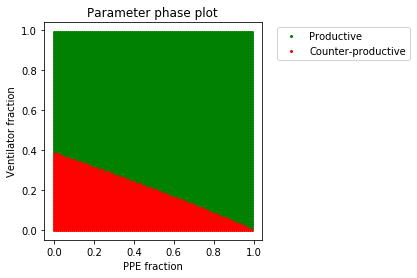

In [201]:
#phase plot
ms=2
plt.plot([i[0] for i in pSys],[i[1] for i in pSys],'go',markersize=ms)
plt.plot([i[0] for i in cpSys],[i[1] for i in cpSys],'ro',markersize=ms)
legend_labels = ("Productive","Counter-productive")
plt.xlabel("PPE fraction")
plt.title("Parameter phase plot")
plt.ylabel("Ventilator fraction")
plt.legend(legend_labels,bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.axes().set_aspect('equal')
#plt.xlim([0,0.5])
#plt.ylim([0,0.5])
plt.show()

In [203]:
#phase plots

##parameters
k=np.zeros(5)
k[0]=0.3 #infection rate
k[1]=0.01 #recovery rate
k[2]=0.01 #PPE fraction
k[3]= 0.7 #recovery rate with treatment
k[4]=0.2 #Ventilator fraction
N=1 #population count
##Initial conditions
ic=np.zeros(3)
ic[0]=0.16 #infected
ic[1]=0 #recovered
ic[2]=0 #healthcare workers
##timeline
tmax=100 #days
tvec=np.arange(0,tmax,0.1)

def IMaxCalculator(varInd,parInd,parValue,plotRange=np.arange(0.0001,1,0.01)):
    ImaxSet=[]
    k[parInd]=parValue
    for m in plotRange:
        ic[varInd]=m
        soln=odeint(modSIRH,ic,tvec,args=(N,k))
        Imax=max([i[0] for i in soln])
        ImaxSet.append([m,Imax])
    return ImaxSet

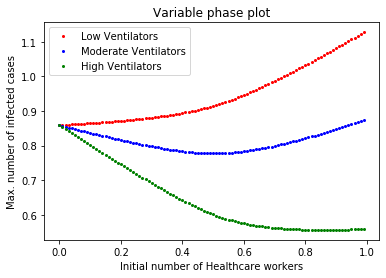

In [205]:
ms=2

ImaxSet=IMaxCalculator(2,4,0.01)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'ro',markersize=ms,label='Low Ventilators')

ImaxSet=IMaxCalculator(2,4,0.4)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'bo',markersize=ms,label='Moderate Ventilators')

ImaxSet=IMaxCalculator(2,4,0.9)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'go',markersize=ms,label='High Ventilators')

plt.legend()
plt.xlabel("Initial number of Healthcare workers")
plt.title("Variable phase plot")
plt.ylabel("Max. number of infected cases")
#plt.xlim([0,0.5])
#plt.ylim([0,0.5])
plt.show()

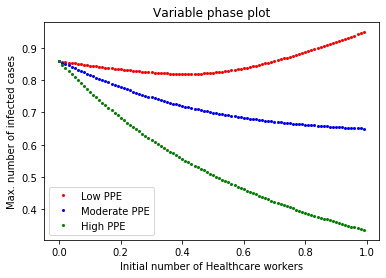

In [220]:
k[3]= 0.3 #recovery rate with treatment
k[4]=0.6 #Ventilator fraction

ms=2

ImaxSet=IMaxCalculator(2,2,0.1)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'ro',markersize=ms,label='Low PPE')

ImaxSet=IMaxCalculator(2,2,0.7)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'bo',markersize=ms,label='Moderate PPE')

ImaxSet=IMaxCalculator(2,2,0.9)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'go',markersize=ms,label='High PPE')

plt.legend()
plt.xlabel("Initial number of Healthcare workers")
plt.title("Variable phase plot")
plt.ylabel("Max. number of infected cases")
#plt.xlim([0,0.5])
#plt.ylim([0,0.5])
plt.show()

# SIRDH model
## Modified SIR model to include role of healthcare workers
### Exploring parameter space

In [45]:
from IPython.display import HTML
from ipywidgets.widgets import interact, FloatSlider, Layout, IntSlider
%matplotlib inline
style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

#model definition
def plot_ode_solution(k0,k1,k2,k3,k4,k5,k6,ic0,ic1,ic2,ic3,tm):
    #model definition
    def modSEIR(y,t,N,k):
        #assignments
        S=N-sum(y[0:3])
        dy=[0]*4

        #reaction rates
        v0=k[0]*(S/N)*(y[0]/N)
        v1=k[1]*(y[0]/N)
        v2=k[2]*(y[1]/N)
        v3=k[3]*(y[0]/N)
        v4=(k[4]-k[6])*(y[3]/N)*(y[0]/N)
#        v4=(k[4]/k[6])*(y[3]/N)*(y[0]/N)        
#        v5=(k[4]*k[5])*(y[3]/N)
        v5=(k[5])*(y[3]/N)*(y[0]/N)

        #ODEs
        dy[0]=N*(v0+v4-v1-v3) #I
        dy[1]=N*(v1+v5-v2) #R
        dy[2]=N*(v3) #D
        dy[3]=N*(-v4) #H

        return dy

    #parameters
    ##default parameters
    '''k=np.zeros(5)
    k[0]=0.1 #rate of infection
    k[1]=0.001 #rate of recovery
    k[2]=0.0001 #rate of second infection
    k[3]=0.001 #rate of death
    k[4]=0.1 #rate of infection for healthcare workers
    k[5]=0.01 #rate of recovery with treatment
    k[6]=0.1 #@param {type:"slider", min:0, max:0.1, step:0.0001} #PPE counts '''
    k=[k0,k1,k2,k3,k4,k5,k6]
    N=1 #population count
    ##Initial conditions
    '''ic=np.zeros(4)
    ic[0]=0.1 #number of infected
    ic[1]=0 #number recovered
    ic[2]=0 #number of dead
    ic[3]=0.01 #number of healthcare workers'''
    ic=[ic0,ic1,ic2,ic3]
    ##timeline
    #tmax=100 #number of days
    tmax=tm #number of days
    tvec=np.arange(0,tmax,0.1)
    #len(k)

    #solving equations
    #soln=odeint(modSEIR,[ic0,ic1,ic2,ic3],tvec,args=(N,k))
    soln=odeint(modSEIR,ic,tvec,args=(N,k))
    #plotting solution
    plt.figure(figsize=(13,5))
    plt.subplot(1,3,1)
    #plt.plot(tvec,soln)
    plt.plot(tvec,[i[0] for i in soln])
    legend_labels = ("Infected","Recovered","Dead","Healthcare")
    plt.xlabel("Time (days)")
    plt.title("Healthcare pressure COVID")
    plt.ylabel("Number of Cases")
    plt.legend(legend_labels)
    #plt.ylim([0,20])

##default parameters
'''k=np.zeros(6)
k[0]=0.1 #rate of infection
k[1]=0.001 #rate of recovery
k[2]=0.0001 #rate of second infection
k[3]=0.001 #rate of death
k[4]=0.01 #rate of recovery with treatment
k[5]=0.1 #PPE counts'''
interact(plot_ode_solution,
        k0=FloatSlider(min=0, max=1, step=0.01, value=0.3, description='Infection rate', style=style, layout=slider_layout),
        k1=FloatSlider(min=0, max=1, step=0.01, value=0.01, description='Recovery rate', style=style, layout=slider_layout),
        k2=FloatSlider(min=0, max=1, step=0.01, value=0.001, description='Second Infection rate', style=style, layout=slider_layout),
        k3=FloatSlider(min=0, max=1, step=0.01, value=0.02, description='Death rate', style=style, layout=slider_layout),
        k4=FloatSlider(min=0, max=1, step=0.01, value=1, description='Infection rate for healthcare', style=style, layout=slider_layout),
        k5=FloatSlider(min=0, max=1, step=0.01, value=0.1, description='Recovery rate with treatment', style=style, layout=slider_layout),
        k6=FloatSlider(min=0.0001, max=1, step=0.01, value=0.4, description='PPE count', style=style, layout=slider_layout),
        ic0=FloatSlider(min=0, max=1, step=0.01, value=0.16, description='#Infected', style=style, layout=slider_layout),
        ic1=FloatSlider(min=0, max=1, step=0.01, value=0, description='#Recovered', style=style, layout=slider_layout),
        ic2=FloatSlider(min=0, max=1, step=0.01, value=0, description='#Dead', style=style, layout=slider_layout),
        ic3=FloatSlider(min=0, max=1, step=0.01, value=0.01, description='#Healthcare', style=style, layout=slider_layout),
        tm=IntSlider(min=0, max=3000, step=10, value=100, description='#days', style=style, layout=slider_layout))

interactive(children=(FloatSlider(value=0.3, description='Infection rate', layout=Layout(width='99%'), max=1.0…

<function __main__.plot_ode_solution(k0, k1, k2, k3, k4, k5, k6, ic0, ic1, ic2, ic3, tm)>

### Plotting interesting observations

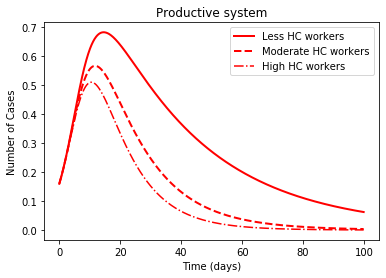

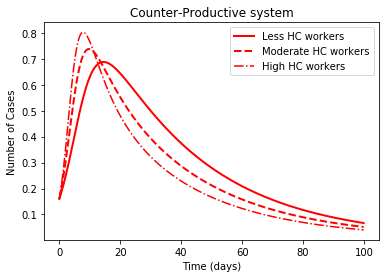

In [53]:
#counter productive system: higher health workers resulting in more patients

#model definition
def modSEIR(y,t,N,k):
    #assignments
    S=N-sum(y[0:3])
    dy=[0]*4

    #reaction rates
    v0=k[0]*(S/N)*(y[0]/N)
    v1=k[1]*(y[0]/N)
    v2=k[2]*(y[1]/N)
    v3=k[3]*(y[0]/N)
    v4=(k[4]-k[6])*(y[3]/N)*(y[0]/N)
#    v4=(k[4]/k[6])*(y[3]/N)*(y[0]/N)
#    v5=(k[5]*k[6])*(y[3]/N)
    v5=(k[5])*(y[3]/N)*(y[0]/N)

    #ODEs
    dy[0]=N*(v0+v4-v1-v3) #I
    dy[1]=N*(v1+v5-v2) #R
    dy[2]=N*(v3) #D
    dy[3]=N*(-v4) #H

    return dy

##parameters
k=np.zeros(7)
k[0]=0.3 #infection rate
k[1]=0.01 #recovery rate
k[2]=0.001 #second infection rate
k[3]=0.02 #death rate
k[4]=1 #infection rate for healthcare workers
k[5]=0.1 #recovery rate with treatment
k[6]=0.4 #PPE counts
#changed parameter
k[4]=0.4
N=1 #population count
##Initial conditions
ic=np.zeros(4)
ic[0]=0.16 #infected
ic[1]=0 #recovered
ic[2]=0 #dead
ic[3]=0.01 #healthcare workers
##timeline
tmax=100 #days
tvec=np.arange(0,tmax,0.1)

##changed parameters
case=[0.01,0.4,0.7]
icNum=3 #index value
##variable plot
plotVar=0 #index ic value
lw=2
##productive system: higher health workers resulting in fewer patients
ic[icNum]=case[0]
soln=odeint(modSEIR,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r-',linewidth=lw)
ic[icNum]=case[1]
soln=odeint(modSEIR,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r--',linewidth=lw)
ic[icNum]=case[2]
soln=odeint(modSEIR,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r-.',markersize=lw)

legend_labels = ("Less HC workers","Moderate HC workers","High HC workers")
plt.xlabel("Time (days)")
plt.title("Productive system")
plt.ylabel("Number of Cases")
plt.legend(legend_labels)
#plt.ylim([0,20])
plt.show()

##counter-productive system: higher health workers resulting in higher patients
k[4]=0.7 #infection rate for healthcare workers
##solving equations
ic[icNum]=case[0]
soln=odeint(modSEIR,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r-',linewidth=lw)
ic[icNum]=case[1]
soln=odeint(modSEIR,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r--',linewidth=lw)
ic[icNum]=case[2]
soln=odeint(modSEIR,ic,tvec,args=(N,k))
plt.plot(tvec,[i[plotVar] for i in soln],'r-.',markersize=lw)

legend_labels = ("Less HC workers","Moderate HC workers","High HC workers")
plt.xlabel("Time (days)")
plt.title("Counter-Productive system")
plt.ylabel("Number of Cases")
plt.legend(legend_labels)
#plt.ylim([0,20])
plt.show()

### Plotting parameter space of interesting observations

In [58]:
#phase plots 2D

##parameters
k=np.zeros(7)
k[0]=0.3 #infection rate
k[1]=0.01 #recovery rate
k[2]=0.001 #second infection rate
k[3]=0.02 #death rate
k[4]=1 #infection rate for healthcare workers
k[5]=0.4 #recovery rate with treatment
k[6]=0.4 #PPE counts
N=1 #population count
##Initial conditions
ic=np.zeros(4)
ic[0]=0.16 #infected
ic[1]=0 #recovered
ic[2]=0 #dead
ic[3]=0.01 #healthcare workers
##timeline
tmax=100 #days
tvec=np.arange(0,tmax,0.1)

cpSys=[]
pSys=[]
plotParams=[5,4] #,6] #index values in k
plotRange=np.arange(0.0001,1.0,0.01)
for m in plotRange:
#    print(m)
    k[plotParams[0]]=m
    for n in plotRange:
        k[plotParams[1]]=n
        
        ic[3]=0.01
        soln=odeint(modSEIR,ic,tvec,args=(N,k))
        Imax1=max([i[0] for i in soln])
        ic[3]=0.7
        soln=odeint(modSEIR,ic,tvec,args=(N,k))
        Imax2=max([i[0] for i in soln])
        if Imax1>Imax2:
            pSys.append([m,n])
        if Imax1<Imax2:
            cpSys.append([m,n])            

#        for p in plotRange:
#            k[plotParams[2]]=p
#            #print(m,n,p)
#            ic[3]=0.01
#            soln=odeint(modSEIR,ic,tvec,args=(N,k))
#            Imax1=max([i[0] for i in soln])
#            ic[3]=0.7
#            soln=odeint(modSEIR,ic,tvec,args=(N,k))
#            Imax2=max([i[0] for i in soln])
#            if Imax1>Imax2:
#                pSys.append([m,n,p])
#            if Imax1<Imax2:
#                cpSys.append([m,n,p])

print(len(pSys),len(cpSys))

8319 1681


In [60]:
#phase plots 3D

##parameters
k=np.zeros(7)
k[0]=0.3 #infection rate
k[1]=0.01 #recovery rate
k[2]=0.001 #second infection rate
k[3]=0.02 #death rate
k[4]=1 #infection rate for healthcare workers
k[5]=0.4 #recovery rate with treatment
k[6]=0.4 #PPE counts
N=1 #population count
##Initial conditions
ic=np.zeros(4)
ic[0]=0.16 #infected
ic[1]=0 #recovered
ic[2]=0 #dead
ic[3]=0.01 #healthcare workers
##timeline
tmax=100 #days
tvec=np.arange(0,tmax,0.1)

cpSys=[]
pSys=[]
plotParams=[4,5,6] #index values in k
plotRange=np.arange(0.0001,1.0,0.03)
for m in plotRange:
    print(m)
    k[plotParams[0]]=m
    for n in plotRange:
        k[plotParams[1]]=n            
        for p in plotRange:
            k[plotParams[2]]=p
            #print(m,n,p)
            ic[3]=0.01
            soln=odeint(modSEIR,ic,tvec,args=(N,k))
            Imax1=max([i[0] for i in soln])
            ic[3]=0.7
            soln=odeint(modSEIR,ic,tvec,args=(N,k))
            Imax2=max([i[0] for i in soln])
            if Imax1>Imax2:
                pSys.append([m,n,p])
            if Imax1<Imax2:
                cpSys.append([m,n,p])

print(len(pSys),len(cpSys))

0.0001
0.0301
0.0601
0.0901
0.1201
0.15009999999999998
0.18009999999999998
0.21009999999999998
0.24009999999999998
0.2701
0.3001
0.33009999999999995
0.3601
0.3901
0.4201
0.45009999999999994
0.48009999999999997
0.5101
0.5401
0.5700999999999999
0.6001
0.6301
0.6600999999999999
0.6900999999999999
0.7201
0.7501
0.7801
0.8100999999999999
0.8401
0.8701
0.9000999999999999
0.9300999999999999
0.9601
0.9901
32630 6674


C:\Users\tvarusai\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


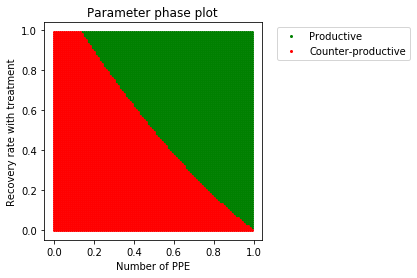

In [55]:
#phase plot
ms=2
plt.plot([i[0] for i in pSys],[i[1] for i in pSys],'go',markersize=ms)
plt.plot([i[0] for i in cpSys],[i[1] for i in cpSys],'ro',markersize=ms)
legend_labels = ("Productive","Counter-productive")
plt.xlabel("Number of PPE")
plt.title("Parameter phase plot")
plt.ylabel("Recovery rate with treatment")
plt.legend(legend_labels,bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.axes().set_aspect('equal')
#plt.xlim([0,0.5])
#plt.ylim([0,0.5])
plt.show()

C:\Users\tvarusai\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


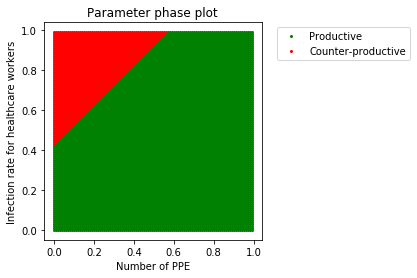

In [57]:
#phase plot
ms=2
plt.plot([i[0] for i in pSys],[i[1] for i in pSys],'go',markersize=ms)
plt.plot([i[0] for i in cpSys],[i[1] for i in cpSys],'ro',markersize=ms)
legend_labels = ("Productive","Counter-productive")
plt.xlabel("Number of PPE")
plt.title("Parameter phase plot")
plt.ylabel("Infection rate for healthcare workers")
plt.legend(legend_labels,bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.axes().set_aspect('equal')
#plt.xlim([0,0.5])
#plt.ylim([0,0.5])
plt.show()

C:\Users\tvarusai\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


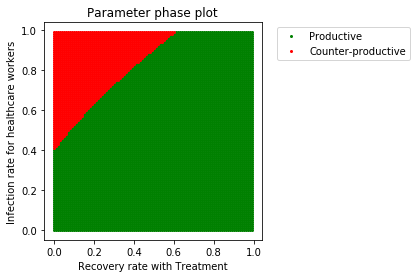

In [59]:
#phase plot
ms=2
plt.plot([i[0] for i in pSys],[i[1] for i in pSys],'go',markersize=ms)
plt.plot([i[0] for i in cpSys],[i[1] for i in cpSys],'ro',markersize=ms)
legend_labels = ("Productive","Counter-productive")
plt.xlabel("Recovery rate with Treatment")
plt.title("Parameter phase plot")
plt.ylabel("Infection rate for healthcare workers")
plt.legend(legend_labels,bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.axes().set_aspect('equal')
#plt.xlim([0,0.5])
#plt.ylim([0,0.5])
plt.show()

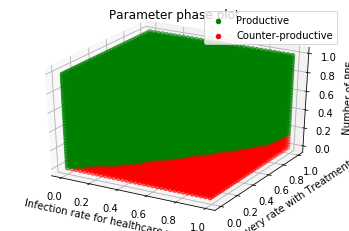

In [61]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
#phase plot
mpl.rcParams['legend.fontsize']=10
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter([i[0] for i in pSys],[i[1] for i in pSys],[i[2] for i in pSys],marker='o',c='g',label='Productive')
ax.scatter([i[0] for i in cpSys],[i[1] for i in cpSys],[i[2] for i in cpSys],marker='o',c='r',label='Counter-productive')
ax.set_xlabel("Infection rate for healthcare workers")
ax.set_ylabel("Recovery rate with Treatment")
ax.set_zlabel("Number of PPE")
legend_labels = ("Productive","Counter-productive")
plt.title("Parameter phase plot")
ax.legend(loc='upper right')
plt.show()

### Plotting variable space of interesting observations

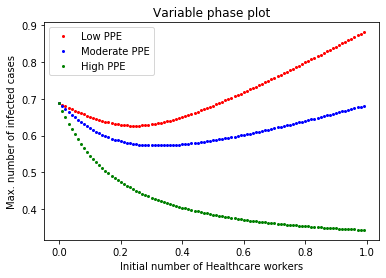

In [67]:
#phase plots

##parameters
k=np.zeros(7)
k[0]=0.3 #infection rate
k[1]=0.01 #recovery rate
k[2]=0.001 #second infection rate
k[3]=0.02 #death rate
k[4]=1 #infection rate for healthcare workers
k[5]=0.7 #recovery rate with treatment
k[6]=0.4 #PPE counts
N=1 #population count
##Initial conditions
ic=np.zeros(4)
ic[0]=0.16 #infected
ic[1]=0 #recovered
ic[2]=0 #dead
ic[3]=0.01 #healthcare workers
##timeline
tmax=100 #days
tvec=np.arange(0,tmax,0.1)

def IMaxCalculator(varInd,parInd,parValue,plotRange=np.arange(0.0001,1,0.01)):
    ImaxSet=[]
    k[parInd]=parValue
    for m in plotRange:
        ic[varInd]=m
        soln=odeint(modSEIR,ic,tvec,args=(N,k))
        Imax=max([i[0] for i in soln])
        ImaxSet.append([m,Imax])
    return ImaxSet

ms=2

ImaxSet=IMaxCalculator(3,6,0.01)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'ro',markersize=ms,label='Low PPE')

ImaxSet=IMaxCalculator(3,6,0.5)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'bo',markersize=ms,label='Moderate PPE')

ImaxSet=IMaxCalculator(3,6,0.9)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'go',markersize=ms,label='High PPE')

plt.legend()
plt.xlabel("Initial number of Healthcare workers")
plt.title("Variable phase plot")
plt.ylabel("Max. number of infected cases")
#plt.xlim([0,0.5])
#plt.ylim([0,0.5])
plt.show()

### Solving with realistic parameters

In [140]:
#parameter definitions

##k[0]->mixing rate of population
##k[1]->infectious period
##k[2]->re-infection period
##k[3]->death period
##k[4]->mixing rate of H
##k[5]->infectious period with treatment
##k[6]->PPE treatment

###Case1: Italy (www.worldometers.info, international.commonwealthfund.org, www.icn.ch, www.ecdc.europa.eu, https://patient.info/news-and-features/coronavirus-how-quickly-do-covid-19-symptoms-develop-and-how-long-do-they-last)
#data from February 20th till April 25th
numDays=65
Popul=60477673
numInf=192990
numDead=25969
numRec=60498
numSus=Popul-numInf
HCfract=0.01 #10 healthcare workers per 1000 population 
numHC=HCfract*Popul
HinfRate=0.09 #9% of infected cases are healthcare workers
numHinf=HinfRate*numInf
ReqPPE=45/10 #number of PPE required per H per I per day

#parameters
k=np.zeros(7)
k[0]=0.275 #27.5% of population are mixing
k[1]=1/14 #time from infection to natural recovery
k[2]=1/30 #re-infection rate is very rare
k[3]=1/21
k[4]=1 #healthcare workers are in contact with patients 100%
k[5]=1/10
k[6]= 0.7 #assume 70% of required PPE is available 
N=Popul*20 #assuming 20% of population are vulnerable

#Initial conditions
ic=np.zeros(4)
ic[0]= 4 #infected
ic[1]= 0 #recovered
ic[2]= 0 #dead
ic[3]= numHC*70 #assuming 70% of healthcare workers are available for SARS-CoV2

k

array([0.275     , 0.07142857, 0.03333333, 0.04761905, 1.        ,
       0.1       , 0.7       ])

# of infected difference (actual-model): -7546893
# of recovered difference (actual-model): -23143857
# of dead difference (actual-model): -699781285


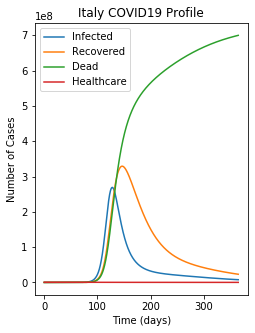

In [163]:
#model definition
def modSEIR(y,t,N,k):
    #assignments
    S=N-sum(y[0:3])
    dy=[0]*4

    #reaction rates
    v0=k[0]*(S/N)*(y[0]/N)
    v1=k[1]*(y[0]/N)
    v2=k[2]*(y[1]/N)
    v3=k[3]*(y[0]/N)
    v4=(k[4]-k[6])*(y[3]/N)*(y[0]/N)
#    v4=(k[4]/k[6])*(y[3]/N)*(y[0]/N)
#    v5=(k[5]*k[6])*(y[3]/N)
    v5=(k[5])*(y[3]/N)*(y[0]/N)

    #ODEs
    dy[0]=N*(v0+v4-v1-v3) #I
    dy[1]=N*(v1+v5-v2) #R
    dy[2]=N*(v3) #D
    dy[3]=N*(-v4) #H

    return dy

##timeline
tmax=1*365 #days
tvec=np.arange(0,tmax,0.1)

##test
#k[0]=k[0]*10

##solving equations
soln=odeint(modSEIR,ic,tvec,args=(N,k))
##plotting solution
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
plt.plot(tvec,soln)
varTC=[i[0] for i in soln]
#plt.plot(tvec,varTC)
legend_labels = ("Infected","Recovered","Dead","Healthcare")
plt.xlabel("Time (days)")
plt.title("Italy COVID19 Profile")
plt.ylabel("Number of Cases")
plt.legend(legend_labels)
#plt.ylim([0,1000000])
print("# of infected difference (actual-model): "+str(int(numInf-[i[0] for i in soln][-1])))
print("# of recovered difference (actual-model): "+str(int(numRec-[i[1] for i in soln][-1])))
print("# of dead difference (actual-model): "+str(int(numDead-[i[2] for i in soln][-1])))

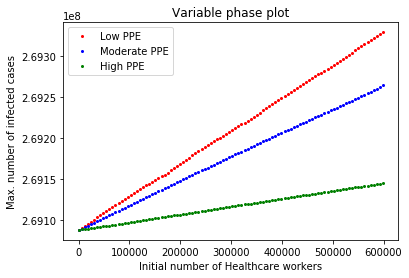

In [159]:
#impact of healthcare workers & PPE

def IMaxCalculator(varInd,parInd,parValue,plotRange=np.arange(numHC*0.0001,numHC*1,numHC*0.01)):
    ImaxSet=[]
    k[parInd]=parValue
    for m in plotRange:
        ic[varInd]=m
        soln=odeint(modSEIR,ic,tvec,args=(N,k))
        Imax=max([i[0] for i in soln])
        ImaxSet.append([m,Imax])
    return ImaxSet

ms=2

ImaxSet=IMaxCalculator(3,6,0.01)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'ro',markersize=ms,label='Low PPE')

ImaxSet=IMaxCalculator(3,6,0.7)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'bo',markersize=ms,label='Moderate PPE')

ImaxSet=IMaxCalculator(3,6,0.9)
plt.plot([i[0] for i in ImaxSet],[i[1] for i in ImaxSet],'go',markersize=ms,label='High PPE')

plt.legend()
plt.xlabel("Initial number of Healthcare workers")
plt.title("Variable phase plot")
plt.ylabel("Max. number of infected cases")
#plt.xlim([0,0.5])
#plt.ylim([0,0.5])
plt.show()

### Parameter estimation

# Detailed model: SEIRDHP
## Modified SEIR epidemic model integrated with healthcare resource consumption

In [220]:
#defining the differential equations
##S is substituted for N minus all other individuals
##y is the variable list 0:E, 1:I1, 2:I2, 3:I3, 4:D, 5:R, 6:H1, 7:H2, 8:H3, 9:H4, 10:P1, 11:P2, 12:P3, 13:P4, 14:P5
def modSEIR(y,t,N,k):
    #assignments
    S=N-sum(y[0:9])
    P5=k[39]-sum(y[10:14])
    dy=[0]*14
    
    
    #reaction rates
    v0=k[0]*(y[5]/N)
    v1=k[1]*(S/N)*(y[1]/N)
    v2=k[2]*(S/N)*(y[2]/N)
    v3=k[3]*(S/N)*(y[3]/N)
    v4=k[4]*(y[0]/N)
    v5=k[5]*(y[1]/N)
    v6=k[6]*(y[2]/N)
    v7=k[7]*(y[3]/N)
    v8=k[8]*(y[1]/N)
    v9=k[9]*(y[2]/N)
    v10=k[10]*(y[3]/N)
    v11=k[11]*(y[1]/N)*(y[12])
    v12=k[12]*(y[1]/N)*(y[12])
    v13=k[13]*(y[1]/N)*(y[12])
    v14=k[14]*(y[1]/N)*(y[12])
    v15=k[15]*(y[2]/N)*(y[12])
    v16=k[16]*(y[2]/N)*(y[12])
    v17=k[17]*(y[2]/N)*(y[12])
    v18=k[18]*(y[2]/N)*(y[12])
    v19=k[19]*(y[3]/N)*(y[12])
    v20=k[20]*(y[3]/N)*(y[12])
    v21=k[21]*(y[3]/N)*(y[12])
    v22=k[22]*(y[3]/N)*(y[12])
    v23=k[23]*(y[10])
    v24=k[24]*(y[11])
    v25=k[25]*(y[12])
    v26=k[26]*(y[12])
    v27=k[27]*(y[6]/N)*(y[1]/N)
    v28=k[28]*(y[7]/N)*(y[1]/N)
    v29=k[29]*(y[8]/N)*(y[1]/N)
    v30=k[30]*(y[9]/N)*(y[1]/N)
    v31=k[31]*(y[6]/N)*(y[2]/N)
    v32=k[32]*(y[7]/N)*(y[2]/N)
    v33=k[33]*(y[8]/N)*(y[2]/N)
    v34=k[34]*(y[9]/N)*(y[2]/N)
    v35=k[35]*(y[6]/N)*(y[3]/N)
    v36=k[36]*(y[7]/N)*(y[3]/N)
    v37=k[37]*(y[8]/N)*(y[3]/N)
    v38=k[38]*(y[9]/N)*(y[3]/N)
    v39=k[39]
    
    #ODEs
    dy[0]=N*(v1+v2+v3+v27+v28+v29+v30+v31+v32+v33+v34+v35+v36+v37+v38-v4) #E
    dy[1]=N*(v4-v5-v8) #I1
    dy[2]=N*(v5-v6-v9) #I2
    dy[3]=N*(v6-v7-v10) #I3
    dy[4]=N*v7 #D
    dy[5]=N*(v8+v9+v10-v0) #R
    dy[6]=N*(-v11-v15-v19-v27-v31-v35) #H1
    dy[7]=N*(-v12-v16-v20-v28-v32-v36) #H2
    dy[8]=N*(-v13-v17-v21-v29-v33-v37) #H3
    dy[9]=N*(-v14-v18-v22-v30-v34-v38) #H4
    dy[10]=N*(v39-v23) #P1
    dy[11]=N*(v23-v24) #P2
    dy[12]=N*(v24-v25-v26-v11-v12-v13-v14-v15-v16-v17-v18-v19-v20-v21-v22) #P3
    dy[13]=N*(v25) #P4
#    dy[14]=N*(v26) #P5

    return dy

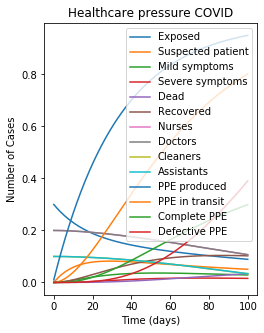

In [250]:
#parameters
##default parameters
k=0.03*np.ones(40) #set all parameters to 0.01
#k=[0.005,0.001,0.001,0.001,0.07,0.16,0.025,0.04,0.04,0.075,0.06,0.001,0.001,0.001,0.001,
#   0.005,0.003,0.002,0.002,0.007,0.005,0.003,0.003,0.009,0.009,0.001,0.001,0.003,0.003,0.001,0.001,
#   0.006,0.005,0.003,0.002,0.007,0.005,0.004,0.003,0.1]

N=1 #population count
##Initial conditions
ic=np.zeros(14)
ic[0]=0.3 #number of infected on day 0
ic[6]=0.2 #number of nurses
ic[7]=0.2 #number of doctors
ic[8]=0.1 #number of cleaners
ic[9]=0.1 #number of assistants
ic[10]=0.01 #number of manufactured PPEs
##timeline
tmax=100 # number of days
tvec=np.arange(0,tmax,0.1)
len(k)

#solving equations
soln=odeint(modSEIR,ic,tvec,args=(N,k))
#plotting solution
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
plt.plot(tvec,soln)
#plt.plot(tvec,[i[12] for i in soln])
legend_labels = ("Exposed","Suspected patient","Mild symptoms","Severe symptoms","Dead","Recovered","Nurses","Doctors","Cleaners","Assistants","PPE produced","PPE in transit","Complete PPE","Defective PPE")
plt.xlabel("Time (days)")
plt.title("Healthcare pressure COVID")
plt.ylabel("Number of Cases")
plt.legend(legend_labels)
#plt.ylim([0,20])

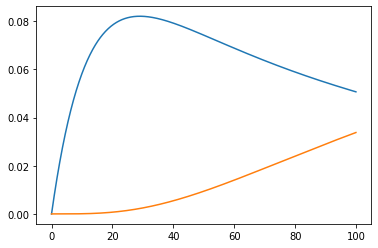

In [255]:
plt.plot(tvec,[i[1] for i in soln])
#plt.plot(tvec,[i[1]+i[2]+i[3] for i in soln])
plt.plot(tvec,[i[4] for i in soln])